In [188]:
# Importing necessary libraries

# For numerical operations and array handling
import numpy as np  

# For data manipulation and analysis
import pandas as pd  

# For handling outliers using the Winsorization technique
from feature_engine.outliers import Winsorizer  

# For data visualization
import seaborn as sns  

# For creating plots
import matplotlib.pyplot as plt  

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split  

# For building a linear regression model
from sklearn.linear_model import LinearRegression  

# For evaluating the model using Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error  


In [189]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv("housing_price_dataset.csv")  

# Display the first 20 rows of the DataFrame to inspect the data
df.head(20)  


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
5,2095,2,3,Suburb,2020,198208.803907
6,2724,2,1,Suburb,1993,343429.319110
7,2044,4,3,Rural,1957,184992.321268
8,2638,4,3,Urban,1959,377998.588152
9,1121,5,2,Urban,2004,95961.926014


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [191]:
# Check for missing values in each column of the DataFrame
# .isnull() returns a DataFrame of the same shape with True for missing values and False otherwise
# .sum() calculates the total number of missing values for each column
df.isnull().sum()


SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [192]:
# Map the values in the "Neighborhood" column to numeric categories
# "Rural" is mapped to 0, "Suburb" to 1, and "Urban" to 2
# This is useful for converting categorical data into numerical format for analysis or modeling
df["Neighborhood"] = df["Neighborhood"].map({"Rural": 0, "Suburb": 1, "Urban": 2})

# Display the first few rows of the DataFrame to verify the changes
df.head()


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


In [193]:
# Check for duplicate rows in the DataFrame
# .duplicated() returns a Series of boolean values:
# - True if a row is a duplicate of a previous row
# - False if the row is unique
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [194]:
# Generate descriptive statistics for numerical columns in the DataFrame
# Includes metrics like count, mean, standard deviation, min, max, and percentiles (25%, 50%, 75%)
df.describe()


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,0.998540,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,0.815838,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,0.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,0.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2.000000,2021.000000,492195.259972


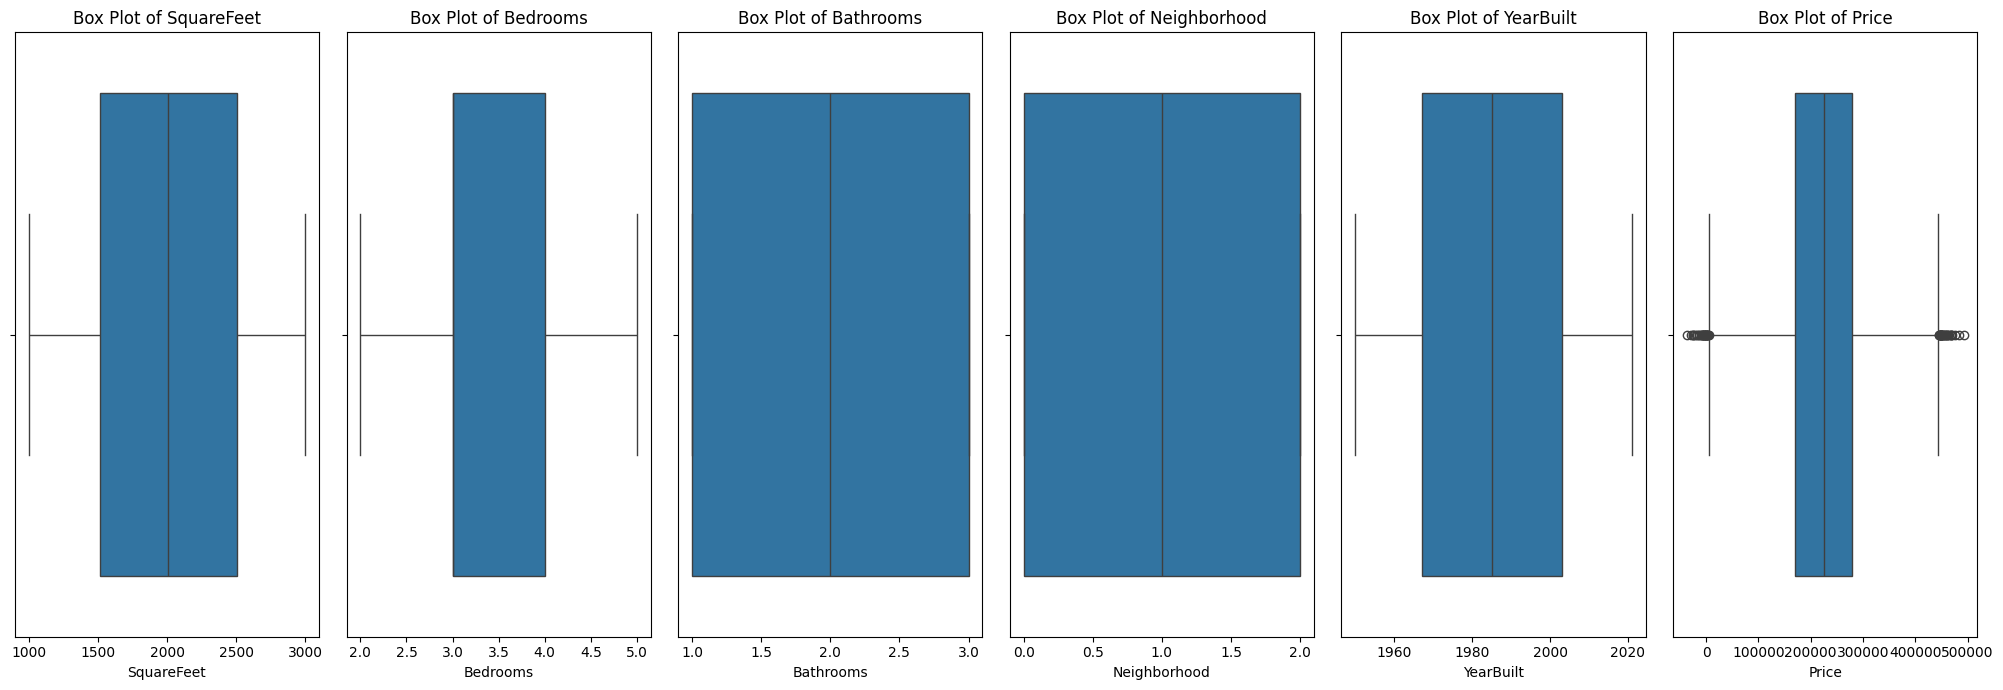

In [195]:

# List of numerical and categorical columns for which to create box plots
columns = ["SquareFeet", "Bedrooms", "Bathrooms", "Neighborhood", "YearBuilt", "Price"]

# Create a figure with subplots; one subplot per column
# nrows=1 ensures all plots are in a single row
# ncols=len(columns) creates one column per variable
# figsize sets the overall size of the figure
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 7))

# Iterate over the columns and create a box plot for each
for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, ax=axes[i])  # Create a box plot for the current column
    axes[i].set_title(f"Box Plot of {col}")  # Add a title to each subplot

# Adjust the layout of the subplots to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()



In [196]:
# Calculate the first quartile (25th percentile) of the "Price" column
q1 = df["Price"].quantile(0.25)

# Calculate the third quartile (75th percentile) of the "Price" column
q3 = df["Price"].quantile(0.75)

# Calculate the interquartile range (IQR), which measures the spread of the middle 50% of the data
iqr = q3 - q1

# Define the lower bound for outliers
# Any value below this is considered an outlier
lower_bound = q1 - 1.5 * iqr

# Define the upper bound for outliers
# Any value above this is considered an outlier
upper_bound = q3 + 1.5 * iqr

# Identify rows in the DataFrame where "Price" falls outside the IQR bounds
iqr_outliers = df[(df["Price"] < lower_bound) | (df["Price"] > upper_bound)]

# Display the first few rows of the outliers detected
iqr_outliers.head()

# Print the total number of outliers detected using the IQR method
print("The number of outliers detected by the IQR method is:", iqr_outliers.shape[0])


The number of outliers detected by the IQR method is: 59


In [197]:
# Filter the DataFrame to exclude outliers based on the previously defined bounds
# Keep only the rows where "Price" is between the lower and upper bounds (inclusive)
df1 = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]

# Print the filtered DataFrame (which excludes outliers)
print(df1)


       SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt          Price
0            2126         4          1             0       1969  215355.283618
1            2459         3          2             0       1980  195014.221626
2            1860         2          1             1       1970  306891.012076
3            2294         2          1             2       1996  206786.787153
4            2130         5          2             1       2001  272436.239065
...           ...       ...        ...           ...        ...            ...
49995        1282         5          3             0       1975  100080.865895
49996        2854         2          2             1       1988  374507.656727
49997        2979         5          3             1       1962  384110.555590
49998        2596         5          2             0       1984  380512.685957
49999        1572         5          3             0       2011  221618.583218

[49941 rows x 6 columns]


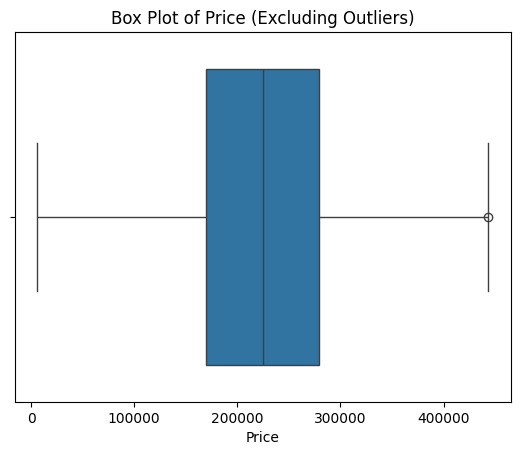

In [198]:
# Create a box plot for the "Price" column in the filtered DataFrame (df1)
# This helps visualize the distribution of the "Price" column and check for any remaining outliers
sns.boxplot(data=df1, x="Price")

# Set the title for the plot to provide context
plt.title("Box Plot of Price (Excluding Outliers)")

# Add labels to the x-axis for clarity
plt.xlabel("Price")

# Display the plot
plt.show()


In [199]:
# Selecting the features (independent variables) and target variable (dependent variable)
# The target variable 'y' is the "Price" column, and the features 'X' are all the other columns.

# Drop the "Price" column from the DataFrame to get the features (X)
# This ensures that X contains all columns except "Price"
X = df1.drop(columns=["Price"])

# Extract the "Price" column as the target variable (y)
# This means y will be the "Price" values that we want to predict
y = df1["Price"]



In [200]:
# Split the dataset into training and testing sets
# We use 70% of the data for training and 30% for testing (test_size=0.3)
# The random_state ensures reproducibility of the split by setting a fixed seed for randomness

X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features for training and testing
    y,  # Target variable for training and testing
    test_size=0.3,  # 30% of the data will be used for testing
    random_state=42  # Random seed for reproducibility of the split
)

# Output the shape of the resulting data splits to verify the size of the training and testing sets
print(f"Training set features (X_train) shape: {X_train.shape}")
print(f"Test set features (X_test) shape: {X_test.shape}")
print(f"Training set target (y_train) shape: {y_train.shape}")
print(f"Test set target (y_test) shape: {y_test.shape}")


Training set features (X_train) shape: (34958, 5)
Test set features (X_test) shape: (14983, 5)
Training set target (y_train) shape: (34958,)
Test set target (y_test) shape: (14983,)


In [201]:
# model building and training
model=LinearRegression()

In [202]:
model.fit(X_train,y_train)

LinearRegression()

In [203]:
# Model prediction on the test set
# Use the trained model to predict the target variable (Price) on the test set (X_test)
# This will give us the model's predicted values for the "Price" column in the test data
y_pred = model.predict(X_test)

# Model evaluation: Calculate Mean Squared Error (MSE)
# The MSE measures the average squared difference between the actual and predicted values
# A lower MSE indicates better model performance (smaller error between predicted and actual values)

mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error to evaluate model performance
# This gives an indication of how well the model performed on the test set
print(f"The Mean Squared Error (MSE) is: {mse:.2f}")



The Mean Squared Error (MSE) is: 2474559099.95


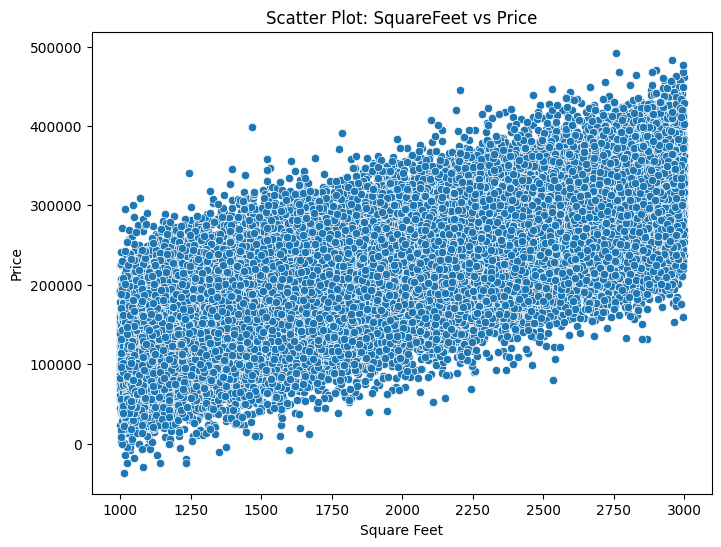

In [204]:
# Scatter plot: Relationship between "SquareFeet" and "Price"
plt.figure(figsize=(8, 6))
sns.scatterplot(x="SquareFeet", y="Price", data=df)
plt.title("Scatter Plot: SquareFeet vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.show()


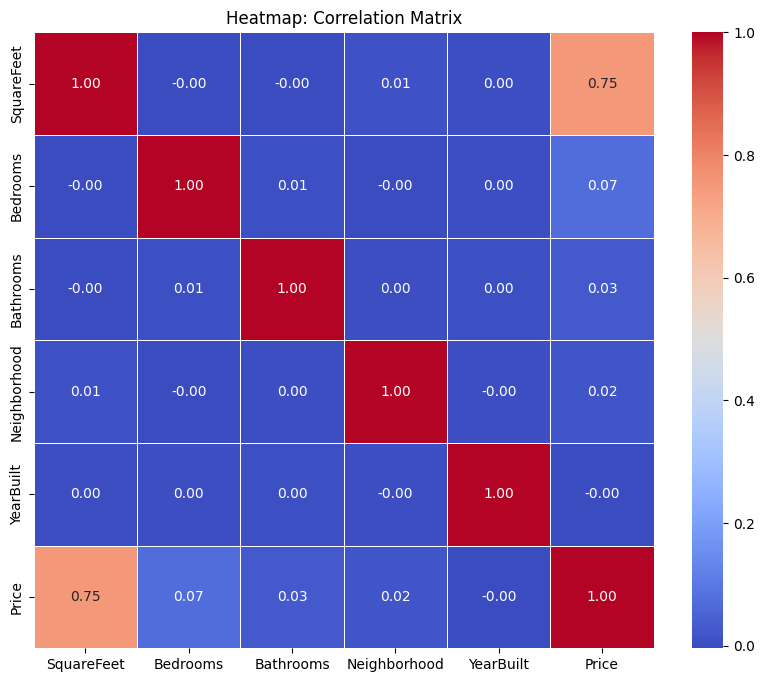

In [205]:
# Heatmap: Correlation matrix of numerical features with respect to "Price"
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Correlation Matrix")
plt.show()


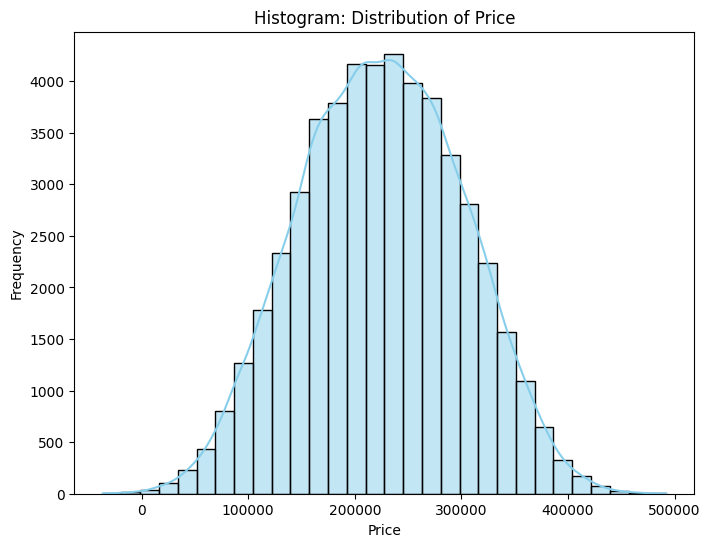

In [206]:
# Histogram: Distribution of "Price"
plt.figure(figsize=(8, 6))
sns.histplot(df["Price"], kde=True, color="skyblue", bins=30)
plt.title("Histogram: Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


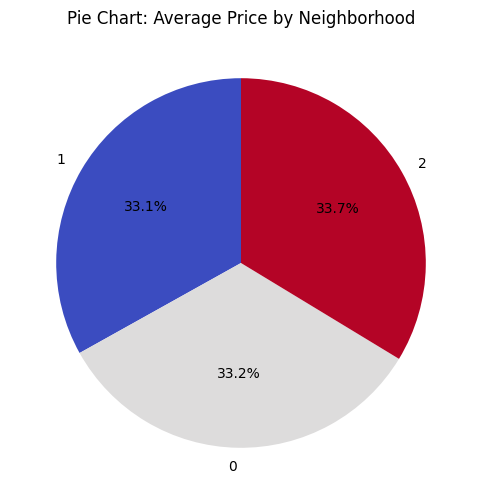

In [207]:
# Pie chart: Distribution of "Neighborhood" in relation to "Price"
neighborhood_price = df.groupby("Neighborhood")["Price"].mean().sort_values()
plt.figure(figsize=(8, 6))
neighborhood_price.plot(kind="pie", autopct='%1.1f%%', startangle=90, cmap="coolwarm")
plt.title("Pie Chart: Average Price by Neighborhood")
plt.ylabel("")  # Hide the ylabel
plt.show()


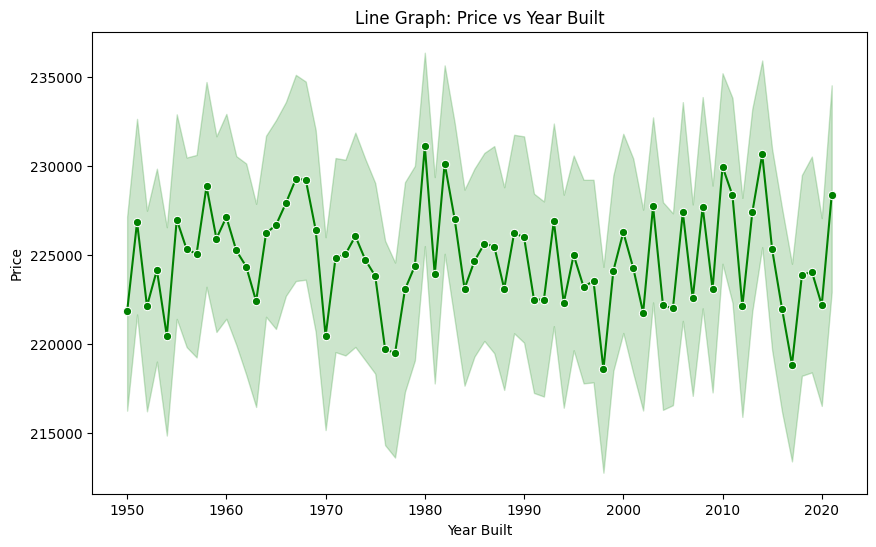

In [208]:
# Line graph: Trend of "Price" over "YearBuilt"
plt.figure(figsize=(10, 6))
sns.lineplot(x="YearBuilt", y="Price", data=df, marker="o", color="green")
plt.title("Line Graph: Price vs Year Built")
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.show()


<Figure size 800x600 with 0 Axes>

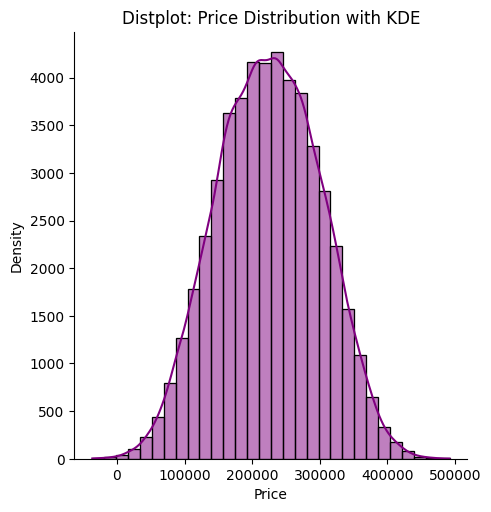

In [209]:
# Distplot: Distribution of "Price" with KDE
plt.figure(figsize=(8, 6))
sns.displot(df["Price"], kde=True, color="purple", bins=30)
plt.title("Distplot: Price Distribution with KDE")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()
